# DATA ANALYSIS FOR SUPERMARKET SALES

## INTRODUCTION
The market competition of supermarkets in the three highlighted cities are tremendously increasing. Therefore, this dataset provides the sales records of the three branches of this supermarket company. 

## QUESTIONS
The data shall be used to determine the following;

1.What product should the company focus on going forward?

2.What City should the company channel it's growth strategy to? 

In [1]:
#we import all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#we load the csv file and name the variable df, Remember to change all forward slash to backward slash
df=pd.read_csv('C:/Users/AIRYOLK NIGERIA LTD/Downloads/supermarket_sales_Sheet1 (2).csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


# DATA WRANGLING
## ASSESS DATA; What data do you have, is the Data valid?

In [3]:
#check for improper conversion of data types
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [4]:
#check for the shape of the data, 1000 rows and 17 columns
df.shape

(1000, 17)

In [5]:
#check for statistical summary, note that it won't add Invoice, branch, city, customer type, gender, product line,date and time since they are strings
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [6]:
#get a wholistic view of the data to check for data collection error
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# DATA CLEANING

In [7]:
#renaming columns, reassigning df.rename to df to modify changes 
df=df.rename(columns={'Invoice ID':'invoice_id','Customer type':'customer_type','Product line':'product_line', 'Unit price':'unit_price','gross margin percentage':'gross_margin_percentage', 'gross income':'gross_income'})
df.head()

,invoice_id,Branch,City,customer_type,Gender,product_line,unit_price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
#delete columns you don't need
df=df.drop(columns=['invoice_id','customer_type','Payment'])
df.head(20)

,Branch,City,Gender,product_line,unit_price,Quantity,Tax 5%,Total,Date,Time,cogs,gross_margin_percentage,gross_income,Rating
0,A,Yangon,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,76.40,4.761905,3.8200,9.6
2,A,Yangon,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,324.31,4.761905,16.2155,7.4
3,A,Yangon,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,465.76,4.761905,23.2880,8.4
4,A,Yangon,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,604.17,4.761905,30.2085,5.3
5,C,Naypyitaw,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,597.73,4.761905,29.8865,4.1
6,A,Yangon,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,413.04,4.761905,20.6520,5.8
7,C,Naypyitaw,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,735.60,4.761905,36.7800,8.0
8,A,Yangon,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,72.52,4.761905,3.6260,7.2
9,B,Mandalay,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,164.52,4.761905,8.2260,5.9


# EXPLORATORY DATA ANALYSIS

In [9]:
df['product_line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: product_line, dtype: int64

In [10]:
df['gross_income'].value_counts()

10.3260    2
4.4640     2
4.1540     2
9.0045     2
22.4280    2
          ..
7.2135     1
19.5895    1
26.9150    1
24.2575    1
30.9190    1
Name: gross_income, Length: 990, dtype: int64

In [11]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [12]:
product_line=df.loc[:,'product_line'].values
gross_income=df.loc[:,'gross_income'].values
Branch=df.loc[:,'Branch'].values

In [13]:
product_line

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Health and beauty', 'Sports and travel',
       'Electronic accessories', 'Electronic accessories',
       'Home and lifestyle', 'Health and beauty', 'Food and beverages',
       'Fashion accessories', 'Electronic accessories',
       'Electronic accessories', 'Food and beverages',
       'Health and beauty', 'Sports and travel', 'Health and beauty',
       'Sports and travel', 'Food and beverages', 'Home and lifestyle',
       'Electronic accessories', 'Health and beauty',
       'Home and lifestyle', 'Electronic accessories',
       'Sports and travel', 'Home and lifestyle', 'Fashion accessories',
       'Fashion accessories', 'Food and beverages', 'Health and beauty',
       'Fashion accessories', 'Sports and travel', 'Sports and travel',
       'Health and beauty', 'Food and beverages', 'Sports and travel',
       'Sports and travel', 'Electronic accessories', 'Health and beauty',
       'Home and l

In [14]:
gross_income

array([26.1415,  3.82  , 16.2155, 23.288 , 30.2085, 29.8865, 20.652 ,
       36.78  ,  3.626 ,  8.226 ,  2.896 ,  5.102 , 11.7375, 21.595 ,
       35.69  , 28.116 , 24.1255, 21.783 ,  8.2005,  4.03  , 21.51  ,
       13.197 ,  3.32  ,  8.64  , 13.2945, 21.036 ,  1.676 ,  8.767 ,
       22.09  , 11.2005, 23.5325, 35.1315, 33.512 ,  9.658 , 19.884 ,
        3.406 , 15.655 , 27.396 , 21.968 , 12.048 ,  4.336 ,  5.611 ,
       20.736 , 39.48  ,  1.537 , 18.792 , 25.5105,  9.0045,  5.679 ,
       41.315 , 31.99  , 11.1475,  3.574 ,  0.7715,  1.616 , 34.392 ,
        4.434 , 35.84  , 36.175 ,  9.183 ,  3.711 , 16.719 , 24.7815,
        7.905 , 15.148 ,  7.935 ,  3.347 , 29.283 , 39.385 ,  0.9165,
       44.74  , 31.06  ,  7.278 , 22.773 , 33.6015, 20.825 , 22.068 ,
        9.0045, 39.155 ,  5.095 , 29.757 , 14.502 ,  7.7   , 16.072 ,
       12.2275, 29.071 , 19.13  , 17.283 ,  2.1235, 23.097 ,  9.476 ,
       22.43  ,  7.693 , 28.962 ,  4.4875,  4.858 , 43.935 ,  3.735 ,
        7.9125, 24.8

In [15]:
Branch

array(['A', 'C', 'A', 'A', 'A', 'C', 'A', 'C', 'A', 'B', 'B', 'B', 'A',
       'A', 'A', 'B', 'A', 'A', 'A', 'B', 'C', 'B', 'B', 'A', 'A', 'A',
       'B', 'A', 'B', 'A', 'B', 'B', 'B', 'A', 'C', 'C', 'A', 'A', 'C',
       'B', 'B', 'C', 'B', 'C', 'C', 'B', 'B', 'B', 'B', 'C', 'C', 'A',
       'B', 'C', 'B', 'C', 'A', 'A', 'A', 'C', 'C', 'C', 'B', 'A', 'B',
       'A', 'C', 'B', 'A', 'A', 'C', 'C', 'B', 'C', 'A', 'C', 'C', 'A',
       'C', 'C', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'A', 'A', 'B', 'C',
       'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'C', 'C', 'A',
       'B', 'A', 'C', 'A', 'C', 'C', 'B', 'C', 'B', 'A', 'C', 'C', 'B',
       'B', 'A', 'B', 'A', 'C', 'B', 'C', 'B', 'A', 'A', 'C', 'C', 'B',
       'B', 'A', 'B', 'B', 'C', 'C', 'A', 'A', 'B', 'A', 'C', 'C', 'C',
       'C', 'A', 'C', 'A', 'C', 'B', 'A', 'B', 'C', 'A', 'C', 'C', 'A',
       'B', 'B', 'B', 'B', 'C', 'A', 'A', 'C', 'B', 'B', 'C', 'A', 'A',
       'A', 'A', 'B', 'C', 'B', 'B', 'A', 'A', 'C', 'A', 'C', 'C

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Gender                   1000 non-null   object 
 3   product_line             1000 non-null   object 
 4   unit_price               1000 non-null   float64
 5   Quantity                 1000 non-null   int64  
 6   Tax 5%                   1000 non-null   float64
 7   Total                    1000 non-null   float64
 8   Date                     1000 non-null   object 
 9   Time                     1000 non-null   object 
 10  cogs                     1000 non-null   float64
 11  gross_margin_percentage  1000 non-null   float64
 12  gross_income             1000 non-null   float64
 13  Rating                   1000 non-null   float64
dtypes: float64(7), int64(1), 

<AxesSubplot:>

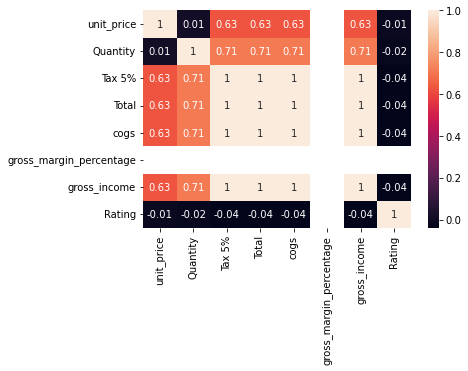

In [17]:
#Visualizing the correlation among all variables
sns.heatmap(np.round(df.corr(),2), annot=True) 

The results show that the unit price is positively correlated 
to the Cost of goods sold with 63% corelation, the quanity and gross income 
has a high correlation of 70% and the ratings barely has a correlation with
any other variable.

<AxesSubplot:xlabel='product_line', ylabel='Count'>

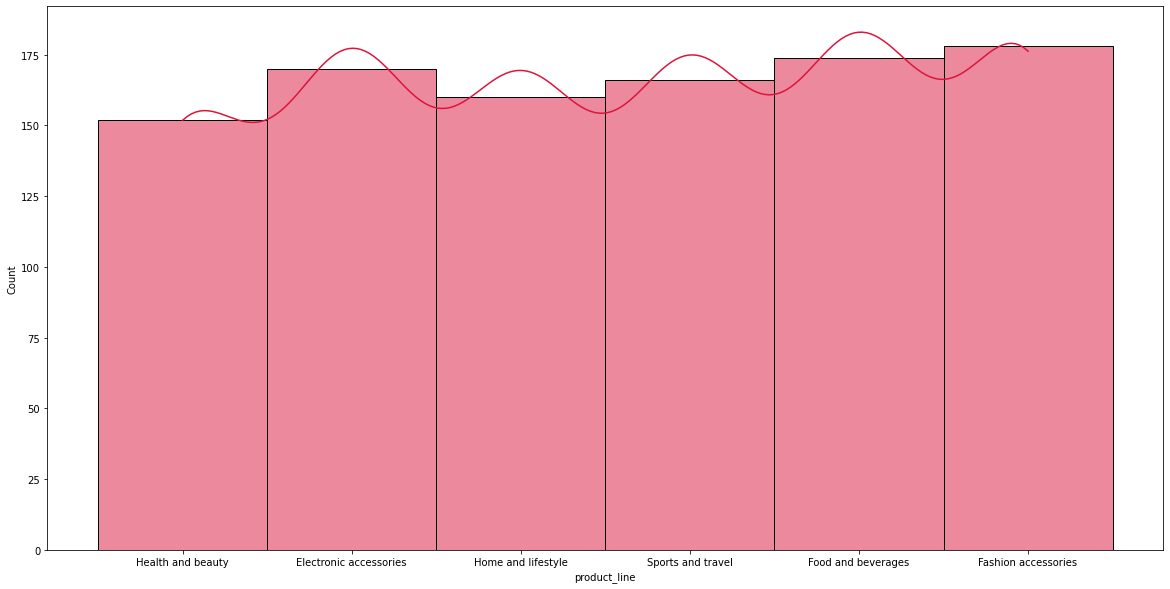

In [18]:
#to determine what product line sold the most
plt.figure(figsize=(20,10))
sns.histplot(data=df, x="product_line", kde=True, color="crimson")

<AxesSubplot:xlabel='Branch', ylabel='count'>

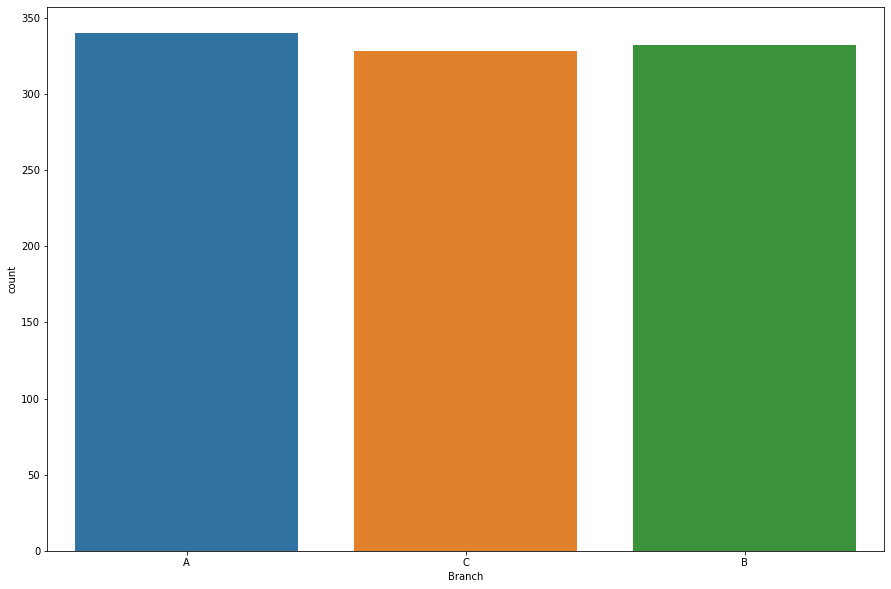

In [19]:
#to determine which branch made the most sales
plt.figure(figsize=(15,10))
sns.countplot(x=df['Branch'])

<AxesSubplot:xlabel='Branch', ylabel='gross_income'>

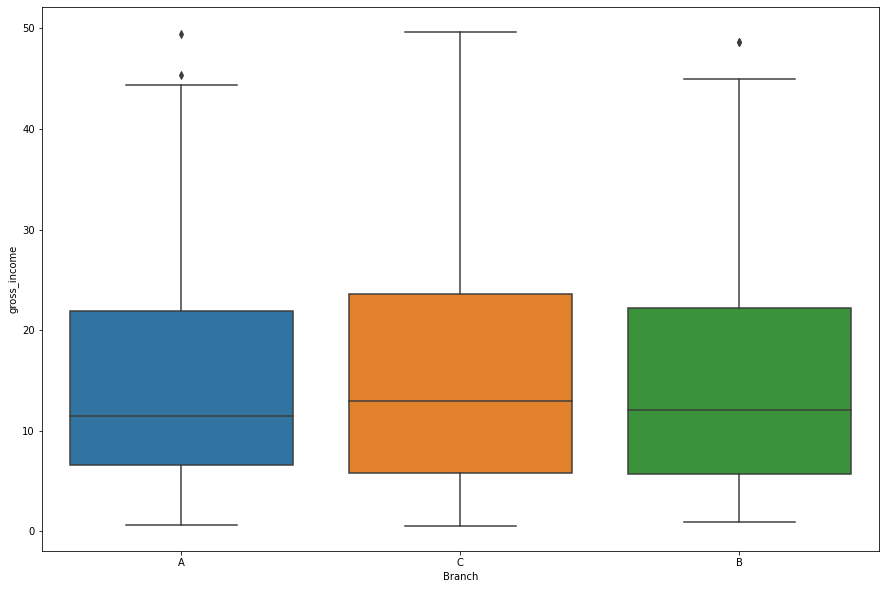

In [20]:
#to determine which branch made the highest income (Bi-variant analysis)
plt.figure(figsize=(15,10))
sns.boxplot(x=df['Branch'], y=df['gross_income'])

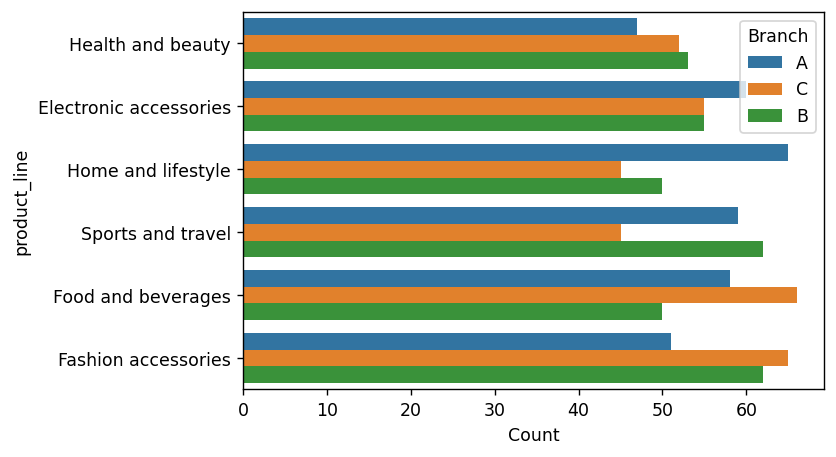

In [22]:
#to determine which product sold the highest in the most profitable branch
plt.figure(dpi=125)
sns.countplot(y ='product_line', hue = "Branch", data = df) 
plt.xlabel('Count')
plt.show()

# CONCLUSION
1.Analyzing the data of each product line shows that FASHION ACCESSORIES was the most sold product item followed by FOOD & BEVERAGES. The company is adviced to stock up more of these two product lines in all branches.

2.Although branch A has higher sales than branch B and C, Branch C is the most profitable in terms of gross income. Therefore, the company should consider expanding branch C and invest more in the Fashion accessories and Food & Beverages since they were the most sold products.

3.It was also observed that the customer ratings is not related to the other variables.